In [ ]:
!pip install pandas numpy seaborn matplotlib statsmodels


# MMM Model

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load dataset (Update file path)
file_path = "/content/drive/MyDrive/Colab Notebooks/Datasets/MMM brand data.csv"  # Change to your actual file path
df = pd.read_csv(file_path)

# Display first few rows
print("\n🔹 Dataset Overview:")
print(df.head())

# Fill missing values with median (for numerical columns)
df.fillna(df.median(), inplace=True)

# Define Independent (X) and Dependent Variable (Y)
X = df[['Price', 'Promotion', 'TV_Spend', 'Radio_Spend', 'Print_Spend',
        'Search_Spend', 'YouTube_Spend', 'Social Media_Spend']]
y = df['Sales']

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit Multiple Linear Regression Model
model = sm.OLS(y, X).fit()

# Display Model Summary
print("\n🔹 Market Mix Model Summary:")
print(model.summary())

# Extract Model Coefficients
coef_df = pd.DataFrame({"Feature": X.columns, "Coefficient": model.params})
coef_df = coef_df.sort_values(by="Coefficient", ascending=False)

# --- STEP 4: CALCULATE ELASTICITIES ---
# Elasticity = Coefficient * (Mean of Feature / Mean of Sales)
elasticities = {}
for col in X.columns:
    if col != "const":  # Skip the intercept
        elasticities[col] = model.params[col] * (df[col].mean() / df['Sales'].mean())

# Convert to DataFrame
elasticity_df = pd.DataFrame(list(elasticities.items()), columns=['Feature', 'Elasticity'])
elasticity_df = elasticity_df.sort_values(by="Elasticity", ascending=False)

print("\n🔹 Elasticities (Impact of Each Channel on Sales):")
print(elasticity_df)




🔹 Dataset Overview:
   Week      Price  Promotion       Sales     TV_Spend  Radio_Spend  \
0     1  14.685360          1  167.481712  2185.430535  3527.163474   
1     2  11.036277          0  442.944230  4778.214379  4085.066287   
2     3  12.078637          1  506.886541  3793.972738  1627.105545   
3     4  15.750872          0  270.708355  3193.963179  3311.933448   
4     5  18.144590          0  116.718348  1202.083882  3072.856924   

   Print_Spend  Search_Spend  YouTube_Spend  Social Media_Spend  
0  3417.156293   4611.101051    3444.378447         2748.516097  
1  1275.738629   2864.122168     860.146564         3860.360476  
2  4425.775535   3762.096223    1590.484152         3032.000513  
3  3259.023076   2462.217341    3981.557059          874.861624  
4  1207.417476   3335.155599    2879.086342         1335.111066  

🔹 Market Mix Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-square

<ipython-input-4-56defe8be268>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_df["Coefficient"], y=coef_df["Feature"], palette="viridis")


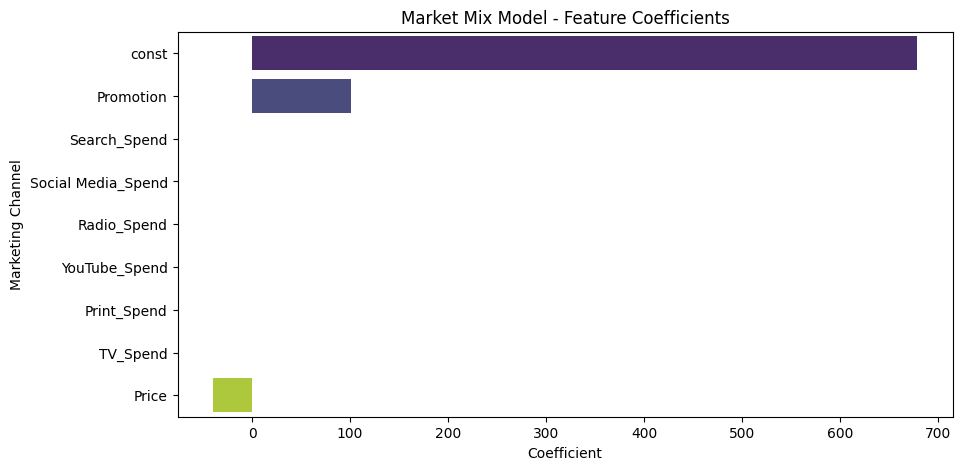

<ipython-input-4-56defe8be268>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=elasticity_df["Elasticity"], y=elasticity_df["Feature"], palette="coolwarm")


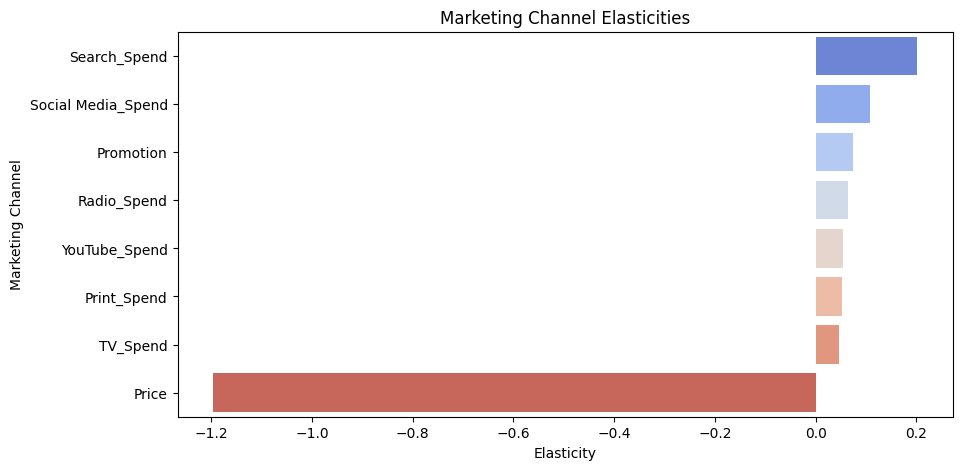

In [4]:

# --- STEP 5: VISUALIZE FEATURE IMPORTANCE ---

# Plot Coefficients
plt.figure(figsize=(10, 5))
sns.barplot(x=coef_df["Coefficient"], y=coef_df["Feature"], palette="viridis")
plt.title("Market Mix Model - Feature Coefficients")
plt.xlabel("Coefficient")
plt.ylabel("Marketing Channel")
plt.show()

# Plot Elasticities
plt.figure(figsize=(10, 5))
sns.barplot(x=elasticity_df["Elasticity"], y=elasticity_df["Feature"], palette="coolwarm")
plt.title("Marketing Channel Elasticities")
plt.xlabel("Elasticity")
plt.ylabel("Marketing Channel")
plt.show()